       count        mean         std       min       25%       50%       75%  \
ID     761.0  381.000000  219.826068    1.0000  191.0000  381.0000  571.0000   
red    761.0  204.793740   30.245628  106.0614  188.9778  210.9944  227.4271   
green  761.0  155.254724   34.383914   52.4216  132.6595  157.4271  179.7520   
blue   761.0  126.664015   43.906906    2.8227   92.7031  127.1705  160.5556   
Y      761.0  159.259569   28.203410   73.2535  142.1512  161.4383  179.9139   
cblue  761.0  108.139356   10.126729   60.8350  103.3048  109.8755  114.7503   
cred   761.0  151.804350    7.939866  129.7848  146.3087  151.5491  156.1568   
class  761.0    1.262812    0.440451    1.0000    1.0000    1.0000    2.0000   

            max  
ID     761.0000  
red    253.8892  
green  229.5633  
blue   232.3944  
Y      216.6640  
cblue  132.4510  
cred   184.8424  
class    2.0000  
ID       0
red      0
green    0
blue     0
Y        0
cblue    0
cred     0
class    0
dtype: int64
ID         int64

ModuleNotFoundError: No module named 'xgboost'

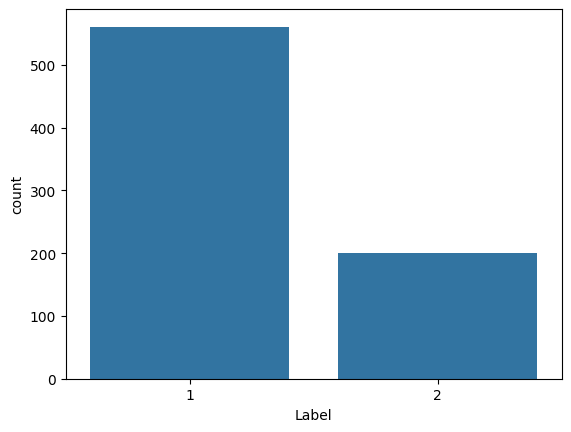

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2ycbcr
import dlib
import pandas as pd

# Load the image
image = io.imread('/Users/moyin/Downloads/try/jaundice (3).jpg')

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Convert the image to grayscale for face detection
gray = np.mean(image, axis=2).astype(np.uint8)

# Detect faces in the image
faces = detector(gray, 1)

if len(faces) > 0:
    # Get the first detected face
    face = faces[0]
    
    # Get facial landmarks
    landmarks = predictor(gray, face)
    
    # Get the bounding box of the face
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()
    
    # Extend the region to include the upper chest
    chest_extension = int((y2 - y1) * 0.5)  # Extend by 50% of face height
    y2 += chest_extension
    
    # Ensure we don't go out of image bounds
    y2 = min(y2, image.shape[0] - 1)
    
    # Extract the region of interest (ROI)
    roi = image[y1:y2, x1:x2]
    
    # Calculate average RGB
    avg_color = np.mean(roi, axis=(0, 1))
    avg_r, avg_g, avg_b = avg_color

    print(f"Average RGB: R={avg_r:.2f}, G={avg_g:.2f}, B={avg_b:.2f}")

    # Convert to YCrCb
    rgb_float = roi.astype(float) / 255.0
    ycrcb = rgb2ycbcr(rgb_float)
    avg_ycrcb = np.mean(ycrcb, axis=(0, 1))
    avg_y, avg_cr, avg_cb = avg_ycrcb

    print(f"Average YCrCb: Y={avg_y:.2f}, Cr={avg_cr:.2f}, Cb={avg_cb:.2f}")

    # Create a dictionary with the results
    data = {
        'red': [avg_r],
        'green': [avg_g],
        'blue': [avg_b],
        'Y': [avg_y],
        'Cr': [avg_cr],
        'Cb': [avg_cb]
    }

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv('results.csv', index=False)
    print("Results saved to results.csv")

    # Visualize the detected region
    fig, ax = plt.subplots()
    ax.imshow(image)
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red')
    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

else:
    print("No face detected in the image.")